<a href="https://colab.research.google.com/github/G-k02/vgg/blob/main/vgg_with_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 [==============================] - 1s 734ms/step
hare :  0.5768906
hen :  0.17877032
Angora :  0.08495101
wood_rabbit :  0.06388627
wallaby :  0.023409434


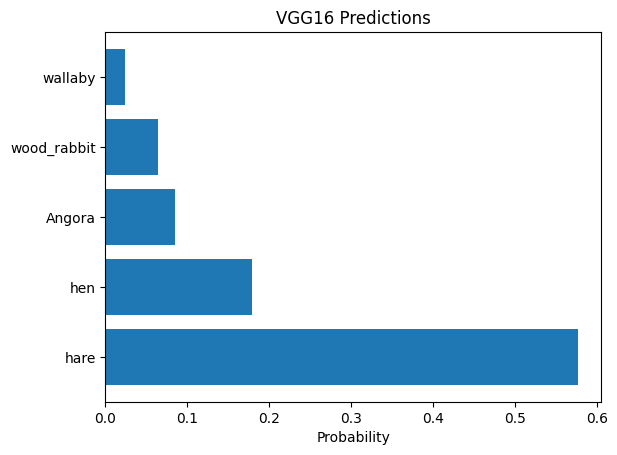

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained VGG model
model = VGG16(weights='imagenet')

# Preprocess the input image
img_path = '/content/European_rabbit.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions
preds = model.predict(x)

# Decode the predictions
decoded_preds = decode_predictions(preds, top=5)[0]

# Extract class labels and probabilities
labels = [label[1] for label in decoded_preds]
probs = [label[2] for label in decoded_preds]
for pred in decoded_preds:
    print(pred[1], ": ", pred[2])

# Create a bar graph
plt.barh(range(len(labels)), probs, align='center')
plt.yticks(range(len(labels)), labels)
plt.xlabel('Probability')
plt.title('VGG16 Predictions')

# Show the plot
plt.show()
